#  No Shows  Medical Appointment

# About the Dataset

### This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

- ‘ScheduledDay’ tells us on what day the patient set up their appointment.
- ‘Neighborhood’ indicates the location of the hospital.
- ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
- Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

# Question to be analysed for the dataset
- # What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [21]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
import datetime
from time import strftime

In [22]:
# Created a list for week days
week_key = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

 # Load Data

In the below cell we will load the data from the CSV file in to a DataFrame. We will also check the row and column count by getting the shape of the data.

In [23]:
# Function created to open the dataset 
def inputfunc(data):
    df = pd.read_csv(data)
    return df

df = inputfunc('noshowappointments-kagglev2-may-2016.csv')
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#  **Basic Info of the Data**

### In the below cells we will see the basic information about the data that we had loaded in the previous step.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### From the above info there are no NaN values in any of the columns.

In [25]:
# Shape of the dataframe
df.shape

(110527, 14)

In [26]:
# Displaying the columns
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

## *From the above Info of the DataFrame and the sample data we can see that there are 14 columns in total.*

- There are 13 Independent Variables -> ['PatientId' 'AppointmentID' 'Gender' 'ScheduledDay' 'AppointmentDay' 'Age' 'Neighbourhood' 'Scholarship' 'Hypertension' 'Diabetes' 'Alcoholism' 'Handicap' 'SMSReceived']

- The Dependent Variable is -> ['NoShow']

- Below, we will drop 'PatientId' and 'AppointmentID' from the dataframe as they are just some system genrated numbers and shouldn't be used for predicting the dependent variable.

# Cleaning the Dataset 

In [27]:
df.drop(["PatientId","AppointmentID"] , axis = 1, inplace = True)

In [28]:
# Correcting Typo's for the Column names 
df = df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow'})
df.head(6)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No


In [29]:
# Print Unique Values
print("Unique Values in `Gender` => {}".format(df.Gender.unique()))
print("Unique Values in `Scholarship` => {}".format(df.Scholarship.unique()))
print("Unique Values in `Hypertension` => {}".format(df.Hypertension.unique()))
print("Unique Values in `Diabetes` => {}".format(df.Diabetes.unique()))
print("Unique Values in `Alcoholism` => {}".format(df.Alcoholism.unique()))
print("Unique Values in `Handicap` => {}".format(df.Handicap.unique()))
print("Unique Values in `SMSReceived` => {}".format(df.SMSReceived.unique()))

Unique Values in `Gender` => ['F' 'M']
Unique Values in `Scholarship` => [0 1]
Unique Values in `Hypertension` => [1 0]
Unique Values in `Diabetes` => [0 1]
Unique Values in `Alcoholism` => [0 1]
Unique Values in `Handicap` => [0 1 2 3 4]
Unique Values in `SMSReceived` => [0 1]


 From the above detail we can see that except for Handicap which has four values and Gender which has 'M' and 'F' all the other features have 'Yes' or 'No' kind of values. So, we will convert those columns to 'object' type.

## Correct Incosistencies in Data

Below we will correct some of the inconsistencies in the data:

- Data Type of ScheduledDay and AppointmentDay will be changed to DateTime.

- As the AppointmentDay has 00:00:00 in it's TimeStamp, we will ignore it.

- As we removed the Time from AppointmentDay's TimeStamp we will do a similar thing for ScheduledDay also. (Ideally the   Time in AppointmentDay column will help us better rather than in the ScheduledDay)

- Change the datatype of other columns according to kind of value mentioned above.

In [30]:
# Changing the datatype of the columns to the respectives
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')
df['Scholarship'] = df['Scholarship'].astype('object')
df['Hypertension'] = df['Hypertension'].astype('object')
df['Diabetes'] = df['Diabetes'].astype('object')
df['Alcoholism'] = df['Alcoholism'].astype('object')
df['Handicap'] = df['Handicap'].astype('object')
df['SMSReceived'] = df['SMSReceived'].astype('object')

In [35]:
# Checking for age flaws
np.sort(df.Age.unique())

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115], dtype=int64)

In the below code we will check few details about the patients with Age 0 and -1.



In [35]:
df.query("Age == -1")

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
99832,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


As there is only 1 patient with Age less than 0 we will delete that record assuming that they was a typo.

In [46]:
# filtering the dataset for age not equal to -1
df = df[df.Age != -1]
df

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No
6,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No
9,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No


Lets Check if there is any row That matches and takes the value og Age = -1

In [41]:
# Lets Check if there is any row That matches and takes the value of Age = -1
df.query('Age == "-1"').any()

Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hypertension      False
Diabetes          False
Alcoholism        False
Handicap          False
SMSReceived       False
NoShow            False
dtype: bool

In [42]:
# Cheecking for record with age less than 1 year having hyper tension and alcoholisum
df[(df.Age <= 0) & ((df.Hypertension.astype(int) == 1) | (df.Diabetes.astype(int) == 1) | (df.Alcoholism.astype(int) == 1))]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow


As we have 3539 patients with Age equal to 0 we are assuming that these are the small babies with few months of Age . Usually as babies doesn't have Hypertension or Diabetes or Alcoholism and this is also proved from above code. lets futher write a query to prove these are babies of below 12 months of age.

In [43]:
# Filtering the dataset with age 0 and scholarship 1
a = df.query('Age == 0 and Scholarship == 1 ' )
a

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
2676,M,2016-03-29,2016-04-29,0,SANTA TEREZA,1,0,0,0,0,1,No
5098,F,2016-05-05,2016-05-12,0,RESISTÊNCIA,1,0,0,0,0,0,No
8231,F,2016-05-03,2016-05-03,0,BELA VISTA,1,0,0,0,0,0,No
19889,F,2016-04-28,2016-05-25,0,BELA VISTA,1,0,0,0,0,1,No
23178,M,2016-05-24,2016-05-24,0,SANTOS REIS,1,0,0,0,0,0,No
26027,F,2016-05-18,2016-05-18,0,BELA VISTA,1,0,0,0,0,0,No
28329,F,2016-04-25,2016-05-09,0,SANTA MARTHA,1,0,0,0,0,0,Yes
29678,F,2016-04-29,2016-05-30,0,SANTOS REIS,1,0,0,0,0,1,No
31514,F,2016-04-20,2016-05-04,0,VILA RUBIM,1,0,0,0,0,1,No
31545,F,2016-05-16,2016-05-16,0,VILA RUBIM,1,0,0,0,0,0,No


As we have no records above, we will confirm our conclusion that Age value of 0 indeed represents babies who are just few months old.

In [44]:
# printing the unique values for scheduled day
print("Unique Values in `ScheduledDay` => {}".format(np.sort(df.ScheduledDay.dt.strftime('%Y-%m-%d').unique())))

Unique Values in `ScheduledDay` => ['2015-11-10' '2015-12-03' '2015-12-07' '2015-12-08' '2015-12-14'
 '2015-12-15' '2016-01-04' '2016-01-05' '2016-01-07' '2016-01-11'
 '2016-01-13' '2016-01-14' '2016-01-19' '2016-01-20' '2016-01-21'
 '2016-01-22' '2016-01-25' '2016-01-26' '2016-01-27' '2016-01-28'
 '2016-01-29' '2016-02-01' '2016-02-02' '2016-02-03' '2016-02-04'
 '2016-02-05' '2016-02-11' '2016-02-12' '2016-02-15' '2016-02-16'
 '2016-02-17' '2016-02-18' '2016-02-19' '2016-02-22' '2016-02-23'
 '2016-02-24' '2016-02-25' '2016-02-26' '2016-02-29' '2016-03-01'
 '2016-03-02' '2016-03-03' '2016-03-04' '2016-03-05' '2016-03-07'
 '2016-03-08' '2016-03-09' '2016-03-10' '2016-03-11' '2016-03-14'
 '2016-03-15' '2016-03-16' '2016-03-17' '2016-03-18' '2016-03-19'
 '2016-03-21' '2016-03-22' '2016-03-23' '2016-03-28' '2016-03-29'
 '2016-03-30' '2016-03-31' '2016-04-01' '2016-04-05' '2016-04-06'
 '2016-04-07' '2016-04-08' '2016-04-09' '2016-04-11' '2016-04-12'
 '2016-04-13' '2016-04-14' '2016-04-15' '

We can see from the above details that the ScheduledDay for appointments are ranging from 2015-11-10 to 2016-06-08 and that's around 7 months of data.

In [42]:
# printing the unique values for appointment day
print("Unique Values in `AppointmentDay` => {}".format(np.sort(df.AppointmentDay.dt.strftime('%Y-%m-%d').unique())))

Unique Values in `AppointmentDay` => ['2016-04-29' '2016-05-02' '2016-05-03' '2016-05-04' '2016-05-05'
 '2016-05-06' '2016-05-09' '2016-05-10' '2016-05-11' '2016-05-12'
 '2016-05-13' '2016-05-14' '2016-05-16' '2016-05-17' '2016-05-18'
 '2016-05-19' '2016-05-20' '2016-05-24' '2016-05-25' '2016-05-30'
 '2016-05-31' '2016-06-01' '2016-06-02' '2016-06-03' '2016-06-06'
 '2016-06-07' '2016-06-08']


From the above detail we can see that AppointmentDay ranges from 2016-04-29 to 2016-06-08. The AppointmentDay spans just above 1 Month in contrast to the ScheduledDay that spans around 7 Months.

In [45]:
# # printing the unique values for Neighbourhood 
print("Unique Values in `Neighbourhood` => {}".format(np.sort(df.Neighbourhood.unique())))

Unique Values in `Neighbourhood` => ['AEROPORTO' 'ANDORINHAS' 'ANTÔNIO HONÓRIO' 'ARIOVALDO FAVALESSA'
 'BARRO VERMELHO' 'BELA VISTA' 'BENTO FERREIRA' 'BOA VISTA' 'BONFIM'
 'CARATOÍRA' 'CENTRO' 'COMDUSA' 'CONQUISTA' 'CONSOLAÇÃO' 'CRUZAMENTO'
 'DA PENHA' 'DE LOURDES' 'DO CABRAL' 'DO MOSCOSO' 'DO QUADRO'
 'ENSEADA DO SUÁ' 'ESTRELINHA' 'FONTE GRANDE' 'FORTE SÃO JOÃO' 'FRADINHOS'
 'GOIABEIRAS' 'GRANDE VITÓRIA' 'GURIGICA' 'HORTO' 'ILHA DAS CAIEIRAS'
 'ILHA DE SANTA MARIA' 'ILHA DO BOI' 'ILHA DO FRADE' 'ILHA DO PRÍNCIPE'
 'ILHAS OCEÂNICAS DE TRINDADE' 'INHANGUETÁ' 'ITARARÉ' 'JABOUR'
 'JARDIM CAMBURI' 'JARDIM DA PENHA' 'JESUS DE NAZARETH' 'JOANA D´ARC'
 'JUCUTUQUARA' 'MARIA ORTIZ' 'MARUÍPE' 'MATA DA PRAIA' 'MONTE BELO'
 'MORADA DE CAMBURI' 'MÁRIO CYPRESTE' 'NAZARETH' 'NOVA PALESTINA'
 'PARQUE INDUSTRIAL' 'PARQUE MOSCOSO' 'PIEDADE' 'PONTAL DE CAMBURI'
 'PRAIA DO CANTO' 'PRAIA DO SUÁ' 'REDENÇÃO' 'REPÚBLICA' 'RESISTÊNCIA'
 'ROMÃO' 'SANTA CECÍLIA' 'SANTA CLARA' 'SANTA HELENA' 'SANTA LUÍZA'
 'SANTA

In [44]:
# Number of unique values in the neighbour column
print("Total Count for `Neighbourhood` => {}".format(df.Neighbourhood.unique().size))

Total Count for `Neighbourhood` => 81


Get Day of the Week for ScheduledDay and AppointmentDay to see if there are many 'NoShows' over the weekends. Week for ScheduledDay and AppointmentDay also helps us to see if there is a particular pattern where most patients are coming for a visit.

In [47]:
# creating two new columns for displaying the weeks name of scheduled day and appointment day
df['ScheduledDay_DOW'] = df['ScheduledDay'].dt.weekday_name
df['AppointmentDay_DOW'] = df['AppointmentDay'].dt.weekday_name
df

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,ScheduledDay_DOW,AppointmentDay_DOW
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Friday
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,Friday
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,Friday
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,Friday
5,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,Wednesday,Friday
6,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,Wednesday,Friday
7,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,Wednesday,Friday
8,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,Friday,Friday
9,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,Wednesday,Friday


In [48]:
# Measuring the waiting duration between the schedule and appointment day 
df['Waiting_Time_days'] = df['AppointmentDay'] - df['ScheduledDay']#
df['Waiting_Time_days'] = df['Waiting_Time_days'].dt.days
df.head(6)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,ScheduledDay_DOW,AppointmentDay_DOW,Waiting_Time_days
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Friday,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,Friday,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,Friday,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,Friday,0
5,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,Wednesday,Friday,2


Ideally the AppointmentDay should be on or after the ScheduledDay. Below we will check if there are any records where there is an inconsistency. In case if the ScheduledDay is after the AppointmentDay we will consider it as an error and correct the ScheduledDay to the AppointmentDay.

In [49]:
# Checking whether the appointment daty is before the scheduled day
print("There are [{}] records where the Waiting Time is less than Zero.".format(df[df.Waiting_Time_days < 0].shape[0]))

There are [5] records where the Waiting Time is less than Zero.


Remove the Rows ,where the waiting time time is negative that is the  schedluded date is after the appointment date

In [50]:
# Filtering out the dataset for the waiting time is less than 0
df.query('Waiting_Time_days < 0')

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,ScheduledDay_DOW,AppointmentDay_DOW,Waiting_Time_days
27033,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,Tuesday,Monday,-1
55226,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,Wednesday,Tuesday,-1
64175,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,Thursday,Wednesday,-1
71533,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,Wednesday,Thursday,-6
72362,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,Wednesday,Tuesday,-1


In [51]:
## Checking whether the appointment daty is before the scheduled day
df = df[df.Waiting_Time_days > 0]
df.query('Waiting_Time_days < 0')

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,ScheduledDay_DOW,AppointmentDay_DOW,Waiting_Time_days


From above query it is proved that our dataset does not have any false value of Appointment day before the Scheluded date.

In [50]:
# Showing all the results out of the dataset 
print("NoShow and Show Count of Patients\n")
print(df.groupby(['NoShow']).size())

print("\nNoShow and Show '%' of Patients\n")
show = df.groupby(['NoShow']).size()[0]/(df.groupby(['NoShow']).size()[0]+df.groupby(['NoShow']).size()[1])
print("Percent of Patients who `Showed Up` => {:.2f}%".format(show*100))
noshow = df.groupby(['NoShow']).size()[1]/(df.groupby(['NoShow']).size()[0]+df.groupby(['NoShow']).size()[1])
print("Percent of Patients who Did `Not Showed Up` => {:.2f}%".format(noshow*100))

NoShow and Show Count of Patients

NoShow
No     51437
Yes    20522
dtype: int64

NoShow and Show '%' of Patients

Percent of Patients who `Showed Up` => 71.48%
Percent of Patients who Did `Not Showed Up` => 28.52%


From the above information we can see that there is clearly a class imbalance. Around 80% of the patients are coming for the visit after an appointment and around 20% are skipping their appointments.

# Data Visualization


5.0 Show/NoShow


Below we can see that out of 110,500 patients around 88,000 of them have turned up and that's around 80%.

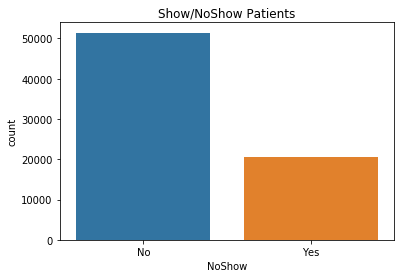

In [51]:
ax = sns.countplot(x=df.NoShow, data=df)
ax.set_title("Show/NoShow Patients")
plt.show()

5.1 Gender

1.Below we can see that out of the 88,000 patients that have turned up, around 57,000 of them are Females and 31,000 are Males.

2.Of the 22,500 patients that haven't come for the visit around 15,000 are Females and 7,500 are Males

3.The ratio of Females to Males that have turned up looks simiar to those who haven't come for a visit.


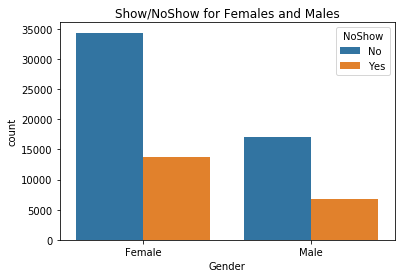

In [52]:
ax = sns.countplot(x=df.Gender, hue=df.NoShow, data=df)
ax.set_title("Show/NoShow for Females and Males")
x_ticks_labels=['Female', 'Male']
ax.set_xticklabels(x_ticks_labels)
plt.show()

From the above visualization we can clearly see that 'Female' patients usually have more appointments that 'Male' patients. So, Gender might be an important factor. But if we closely look at the NoShow distribution across Male's and Female's it is almost the same. So, Gender may not play an important role in determining if a patient comes for a visit or not.

5.2 Age

We will draw a boxplot for the Age feature to check it's distribution.

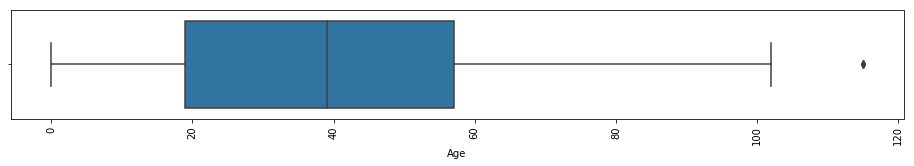

In [53]:
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
_ = sns.boxplot(x=df.Age)

From the above BoxPlot we can see that the Median Age is around 30 and the IQR is between 18 and 55. Though the BoxPlot shows few datapoints as outliers we will not consider them as true outliers for this case.



Below we will plot the number of patients for different Age.

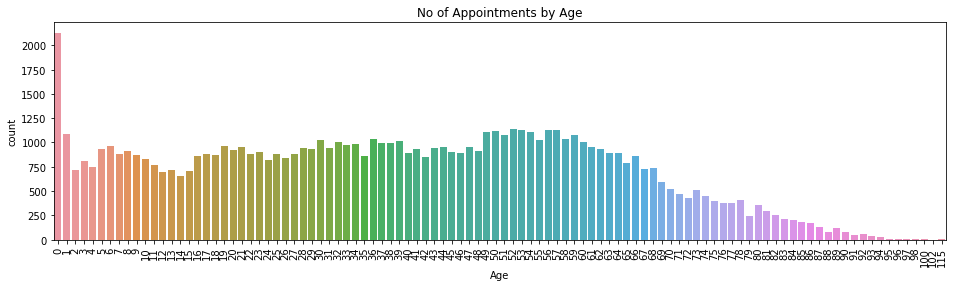

In [54]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.Age)
ax.set_title("No of Appointments by Age")
plt.show()

From the above Histogram we can see that there are peaks for the Infants and then the distribution starts to be uniform. Later, after the Age of around 60 we see a right-skewed distribution.



Below we will plot the Show/NoShow for the patients based on their Age.

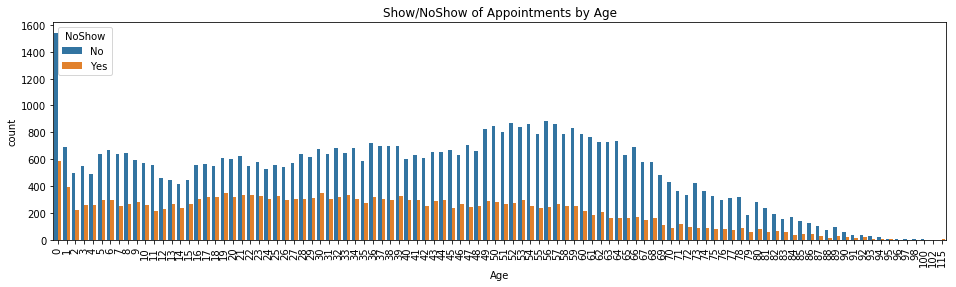

In [55]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.Age, hue=df.NoShow)
ax.set_title("Show/NoShow of Appointments by Age")
plt.show()

From the above visualization looks like the ratio of Show to NoShow is almost the same for all Age's except for 'Age 0' and 'Age 1'. We will get a better clarity on the ratio of Show to NoShow for all Age's.

In [56]:
df_age_ratio = df[df.NoShow == 'No'].groupby(['Age']).size()/df.groupby(['Age']).size()


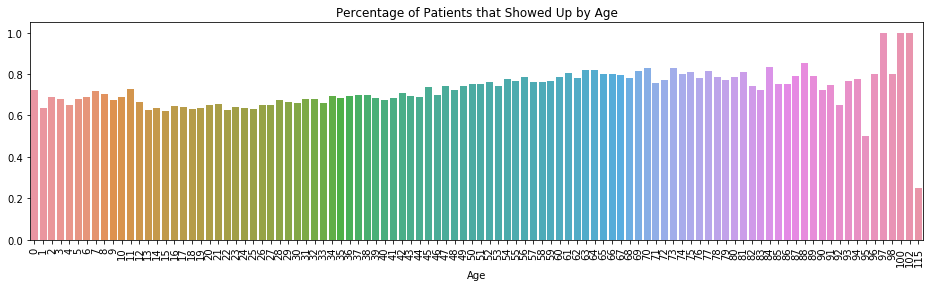

In [57]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.barplot(x=df_age_ratio.index, y=df_age_ratio)
ax.set_title("Percentage of Patients that Showed Up by Age")
plt.show()

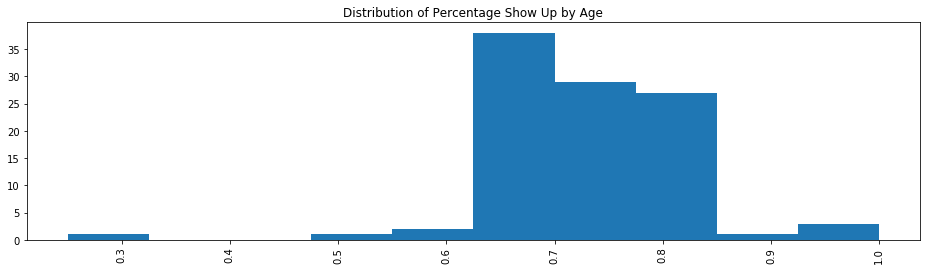

In [58]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = plt.hist(df_age_ratio)
plt.title("Distribution of Percentage Show Up by Age")
plt.show()

From the above visualization we could clearly see that most of the Age group patients have around 80% Show rate

 5.3 Neighbourhood
    
    
Below we will see the patients count for each Neighbourhood.

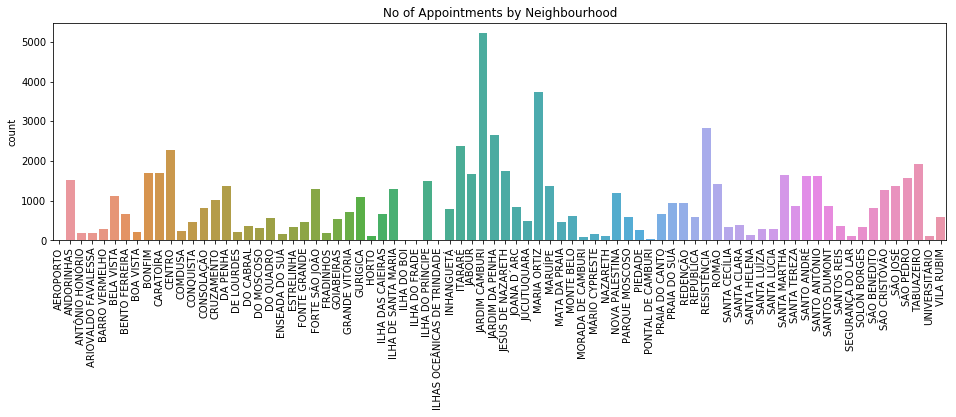

In [59]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=np.sort(df.Neighbourhood))
ax.set_title("No of Appointments by Neighbourhood")
plt.show()

From the above visualization we can see that the number of patients for few Neighbourhood's is very high.

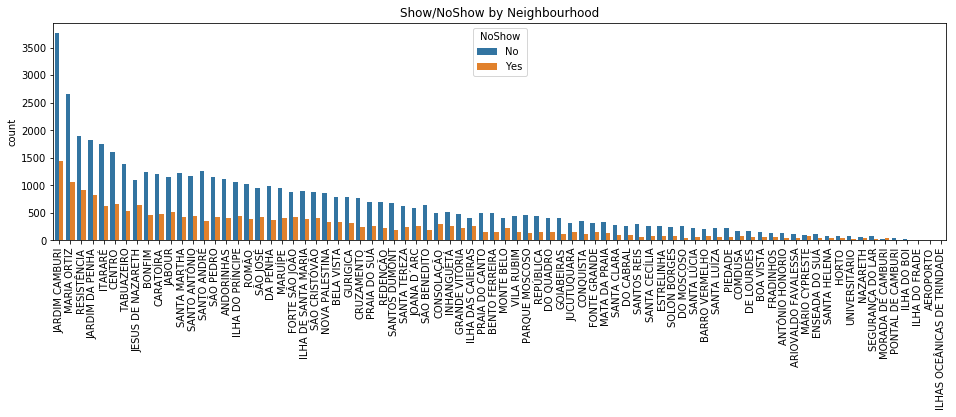

In [60]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=np.sort(df.Neighbourhood), hue=df.NoShow, order=df.Neighbourhood.value_counts().index)
ax.set_title("Show/NoShow by Neighbourhood")
plt.show()

From the above visualization looks like the ratio of Show to NoShow is almost the same for all Neighbourhood's. We will get a better clarity on the ratio of Show to NoShow for all Neighbourhood's in the below visualization.

In [61]:
df_n_ratio = df[df.NoShow == 'No'].groupby(['Neighbourhood']).size()/df.groupby(['Neighbourhood']).size()

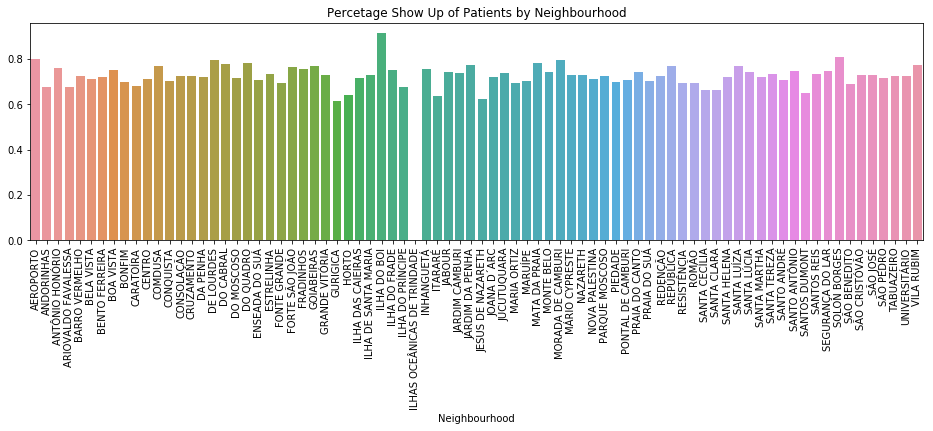

In [62]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.barplot(x=df_n_ratio.index, y=df_n_ratio)
ax.set_title("Percetage Show Up of Patients by Neighbourhood")
plt.show()

As most of the Neighbourhood have around 80% Show rate, this feature may not add much value while building a model to help us determine which segment of patients are tuning up for a visit the most.






5.4 Scholarship

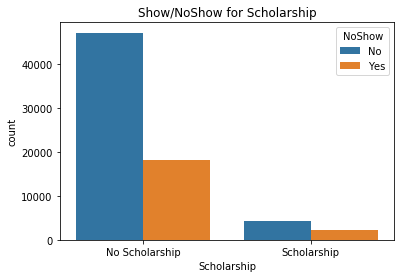

In [64]:
ax = sns.countplot(x=df.Scholarship, hue=df.NoShow, data=df)
ax.set_title("Show/NoShow for Scholarship")
x_ticks_labels=['No Scholarship', 'Scholarship']
ax.set_xticklabels(x_ticks_labels)
plt.show()

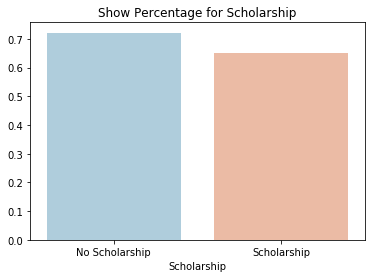

In [46]:
df_s_ratio = df[df.NoShow == 'No'].groupby(['Scholarship']).size()/df.groupby(['Scholarship']).size()
ax = sns.barplot(x=df_s_ratio.index, y=df_s_ratio, palette="RdBu_r")
ax.set_title("Show Percentage for Scholarship")
x_ticks_labels=['No Scholarship', 'Scholarship']
ax.set_xticklabels(x_ticks_labels)
plt.show()

1.From the above visualization we can see that there are around 100,000 patients without Scholarship and out of them around 80% have come for the visit.

2.Out of the 10,500 patients with Scholarship around 75% of them have come for the visit.
So, Scholarship feature could help us in determining if a patient will turn up for the visit after an appointment.



5.5 Hypertension

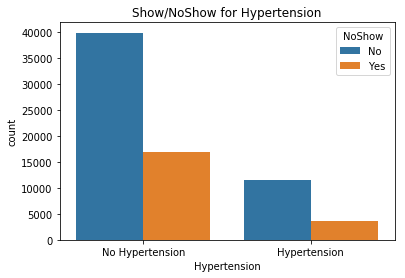

In [65]:
ax = sns.countplot(x=df.Hypertension, hue=df.NoShow, data=df)
ax.set_title("Show/NoShow for Hypertension")
x_ticks_labels=['No Hypertension', 'Hypertension']
ax.set_xticklabels(x_ticks_labels)
plt.show()

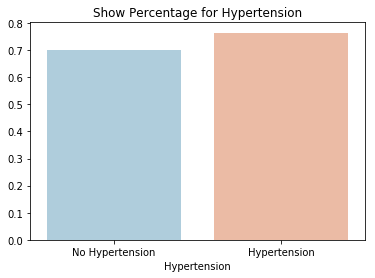

In [66]:
df_h_ratio = df[df.NoShow == 'No'].groupby(['Hypertension']).size()/df.groupby(['Hypertension']).size()
ax = sns.barplot(x=df_h_ratio.index, y=df_h_ratio, palette="RdBu_r")
ax.set_title("Show Percentage for Hypertension")
x_ticks_labels=['No Hypertension', 'Hypertension']
ax.set_xticklabels(x_ticks_labels)
plt.show()

1.From the above visualization we can see that there are around 88,000 patients without Hypertension and out of them around 78% have come for the visit.

2.Out of the 22,500 patients with Hypertension around 85% of them have come for the visit.
So, Hypertension feature could help us in determining if a patient will turn up for the visit after an appointment.



5.6 Diabetes

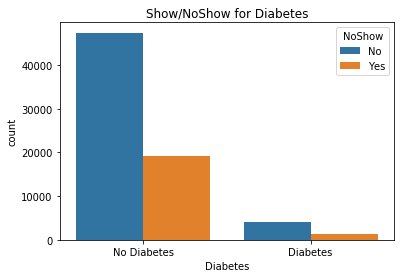

In [67]:
ax = sns.countplot(x=df.Diabetes, hue=df.NoShow, data=df)
ax.set_title("Show/NoShow for Diabetes")
x_ticks_labels=['No Diabetes', 'Diabetes']
ax.set_xticklabels(x_ticks_labels)
plt.show()

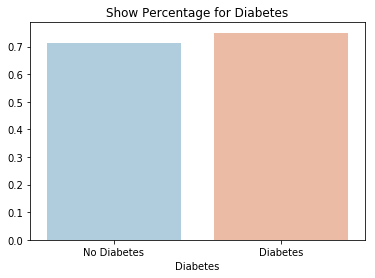

In [68]:
df_d_ratio = df[df.NoShow == 'No'].groupby(['Diabetes']).size()/df.groupby(['Diabetes']).size()
ax = sns.barplot(x=df_d_ratio.index, y=df_d_ratio, palette="RdBu_r")
ax.set_title("Show Percentage for Diabetes")
x_ticks_labels=['No Diabetes', 'Diabetes']
ax.set_xticklabels(x_ticks_labels)
plt.show()

1.From the above visualization we can see that there are around 102,000 patients without Diabetes and out of them around 80% have come for the visit.

2.Out of the 8,500 patients with Diabetes around 83% of them have come for the visit.
So, Diabetes feature could help us in determining if a patient will turn up for the visit after an appointment.


5.7 Alcoholism

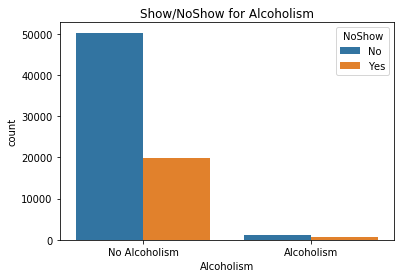

In [69]:
ax = sns.countplot(x=df.Alcoholism, hue=df.NoShow, data=df)
ax.set_title("Show/NoShow for Alcoholism")
x_ticks_labels=['No Alcoholism', 'Alcoholism']
ax.set_xticklabels(x_ticks_labels)
plt.show()

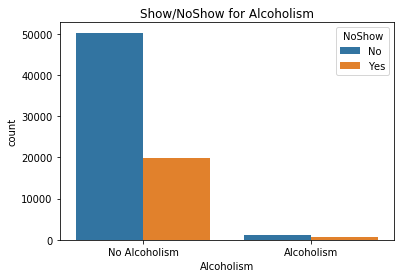

In [70]:
ax = sns.countplot(x=df.Alcoholism, hue=df.NoShow, data=df)
ax.set_title("Show/NoShow for Alcoholism")
x_ticks_labels=['No Alcoholism', 'Alcoholism']
ax.set_xticklabels(x_ticks_labels)
plt.show()

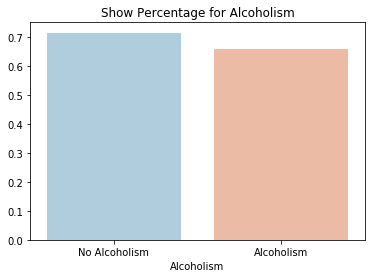

In [71]:
df_a_ratio = df[df.NoShow == 'No'].groupby(['Alcoholism']).size()/df.groupby(['Alcoholism']).size()
ax = sns.barplot(x=df_a_ratio.index, y=df_a_ratio, palette="RdBu_r")
ax.set_title("Show Percentage for Alcoholism")
x_ticks_labels=['No Alcoholism', 'Alcoholism']
ax.set_xticklabels(x_ticks_labels)
plt.show()

1.From the above visualization we can see that there are around 105,000 patients without Alcoholism and out of them around 80% have come for the visit.

2.Out of the 5,500 patients with Alcoholism around 80% of them have come for the visit.
As the percentage of visits for patients with and without Alcoholism is the same it may not help us in determining if a patient will come for a visit.



5.8 Handicap

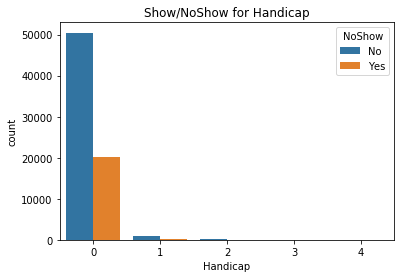

In [72]:
ax = sns.countplot(x=df.Handicap, hue=df.NoShow, data=df)
ax.set_title("Show/NoShow for Handicap")
plt.show()

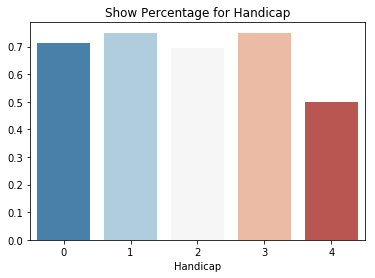

In [73]:
df_ha_ratio = df[df.NoShow == 'No'].groupby(['Handicap']).size()/df.groupby(['Handicap']).size()
ax = sns.barplot(x=df_ha_ratio.index, y=df_ha_ratio, palette="RdBu_r")
ax.set_title("Show Percentage for Handicap")
plt.show()

1.From the above visualization we can see that there are around 110,000 patients without Handicap and out of them around 80% have come for the visit.

2.As we can see a clear distinction between different Handicap levels this feature will help us in determining if a patient will turn up for the visit after taking an appointment.




5.9 SMSReceived

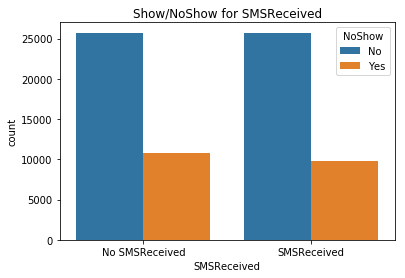

In [74]:
ax = sns.countplot(x=df.SMSReceived, hue=df.NoShow, data=df)
ax.set_title("Show/NoShow for SMSReceived")
x_ticks_labels=['No SMSReceived', 'SMSReceived']
ax.set_xticklabels(x_ticks_labels)
plt.show()

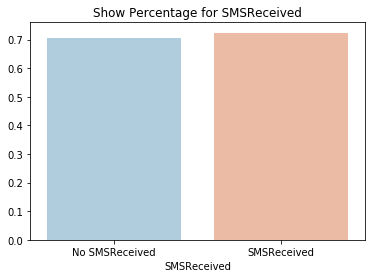

In [75]:
df_s_ratio = df[df.NoShow == 'No'].groupby(['SMSReceived']).size()/df.groupby(['SMSReceived']).size()
ax = sns.barplot(x=df_s_ratio.index, y=df_s_ratio, palette="RdBu_r")
ax.set_title("Show Percentage for SMSReceived")
x_ticks_labels=['No SMSReceived', 'SMSReceived']
ax.set_xticklabels(x_ticks_labels)
plt.show()

From the above visualization we can see that there are around 75,000 patients who have not received SMS and out of them around 84% have come for the visit.
Out of the 35,500 patients who have received SMS around 72% of them have come for the visit. (This looks opposite to what usually happens. People who do receive a reminder SMS usually tend to visit the hospital more than those who haven't received an SMS. Or this could be an SMS that was recived while booking an appointment and could possibly have no correlation with the visit probability.)
As we can see a clear distinction between people reveiving SMS and not receiving SMS this feature will help us in determining if a patient will turn up for the visit after taking an appointment.



5.10 ScheduledDay_DOW

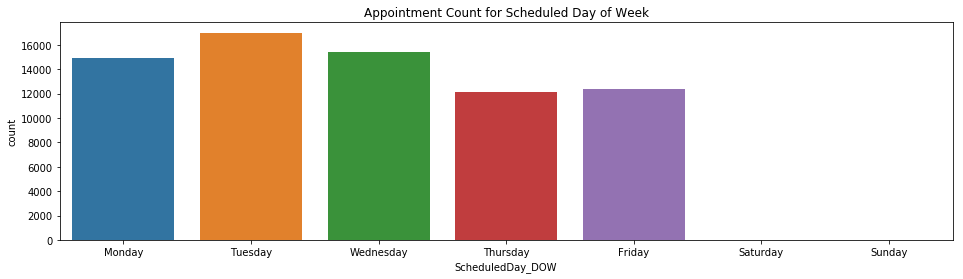

In [76]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.ScheduledDay_DOW, order=week_key)
ax.set_title("Appointment Count for Scheduled Day of Week")
plt.show();

Looks like the call center that takes the appointments doesn't work over the weekends as we do not see any appointments taken on Saturday and `Sunday

5.11 AppointmentDay_DOW

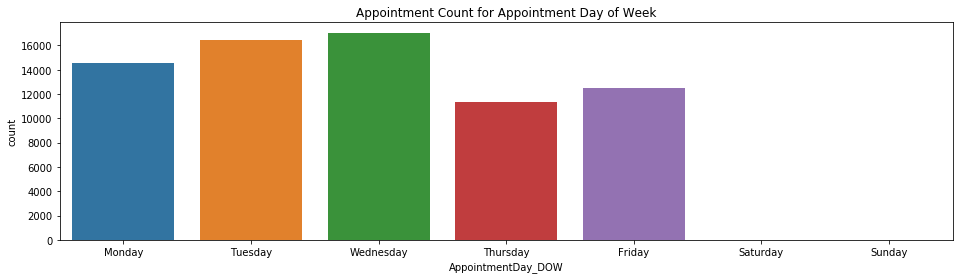

In [77]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.AppointmentDay_DOW,order=week_key)
ax.set_title("Appointment Count for Appointment Day of Week")
plt.show()

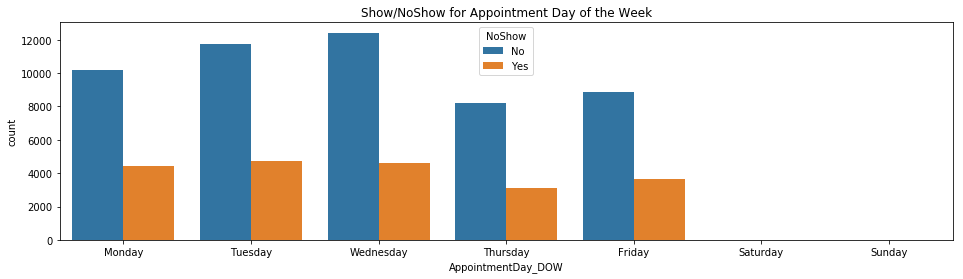

In [78]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.AppointmentDay_DOW,order=week_key, hue=df.NoShow)
ax.set_title("Show/NoShow for Appointment Day of the Week")
plt.show()

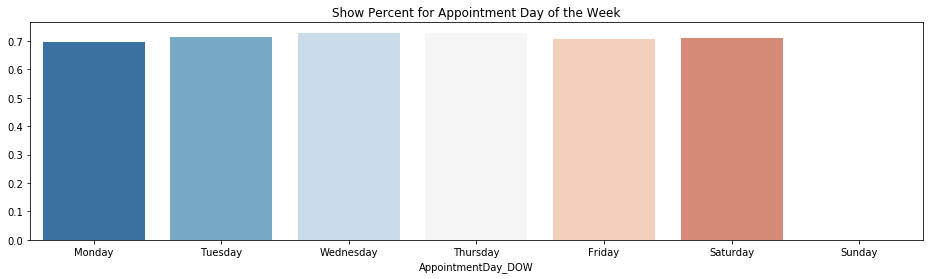

In [79]:
df_a_dow_ratio = df[df.NoShow == 'No'].groupby(['AppointmentDay_DOW']).size()/df.groupby(['AppointmentDay_DOW']).size()
plt.figure(figsize=(16,4))
ax = sns.barplot(x=df_a_dow_ratio.index, y=df_a_dow_ratio,order=week_key, palette="RdBu_r")
ax.set_title("Show Percent for Appointment Day of the Week")
plt.show()

As we predicted earlier, we do not see a clear pattern in the patients visits based on the week day. But we can observe that on Saturday's the percentage of visits is less. So, AppointmentDay_DOW can help us in predicting the visits by a small number.


5.12 Waiting_Time

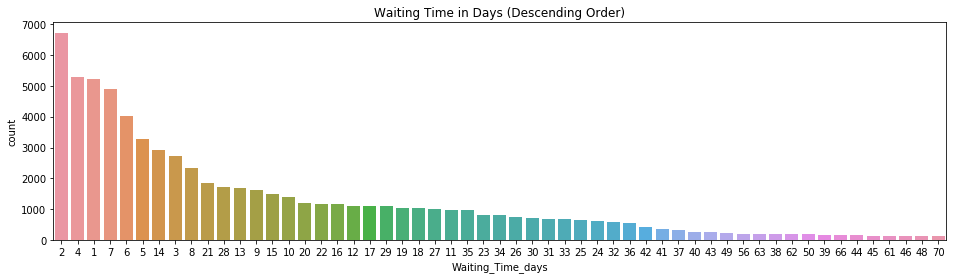

In [80]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.Waiting_Time_days, order=df.Waiting_Time_days.value_counts().iloc[:55].index)
ax.set_title("Waiting Time in Days (Descending Order)")
plt.show()

From the above visualization we can see that most of the patients are booking their appointments on the same day. The next highest waiting times are 2days, 4 days and 1 day.

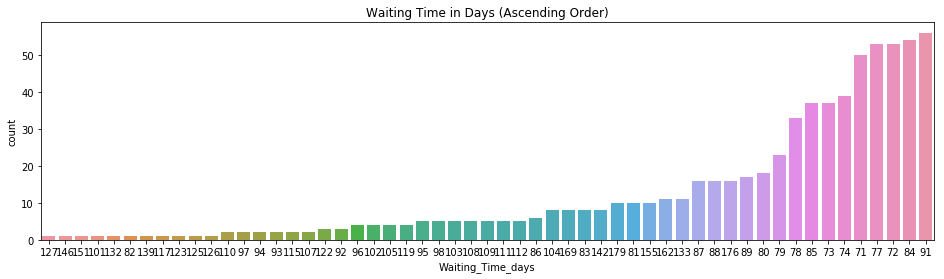

In [81]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.Waiting_Time_days, order=df.Waiting_Time_days.value_counts(ascending=True).iloc[:55].index)
ax.set_title("Waiting Time in Days (Ascending Order)")
plt.show()

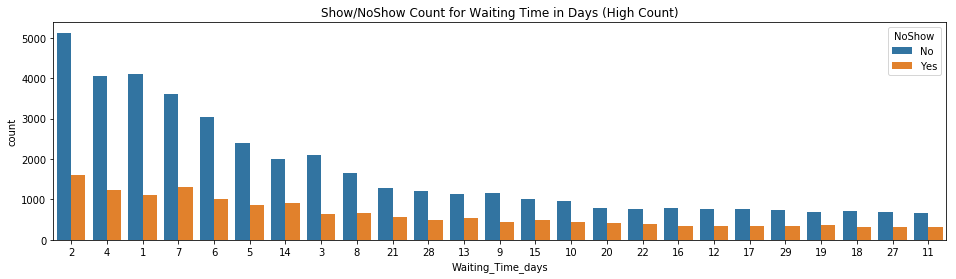

In [82]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.Waiting_Time_days, hue=df.NoShow, order=df.Waiting_Time_days.value_counts().iloc[:25].index)
ax.set_title("Show/NoShow Count for Waiting Time in Days (High Count)")
plt.show()

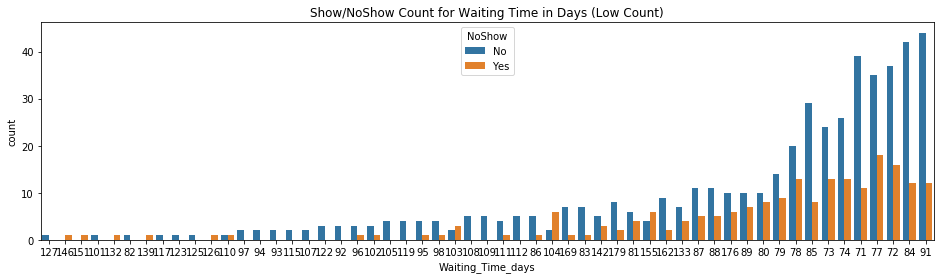

In [83]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.Waiting_Time_days, hue=df.NoShow, order=df.Waiting_Time_days.value_counts(ascending=True).iloc[:55].index)
ax.set_title("Show/NoShow Count for Waiting Time in Days (Low Count)")
plt.show()

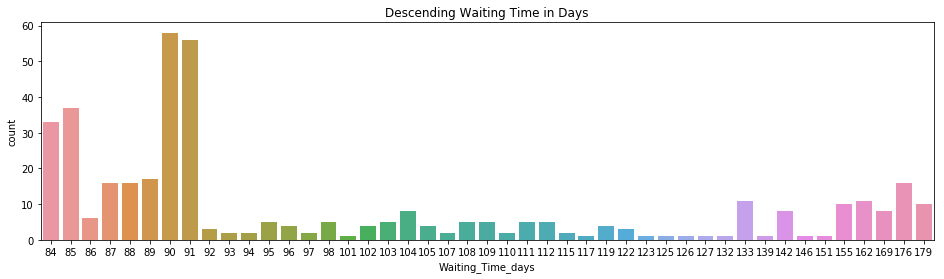

In [84]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df[['Waiting_Time_days']].sort_values('Waiting_Time_days', ascending=False).Waiting_Time_days.iloc[:400])
ax.set_title("Descending Waiting Time in Days")
plt.show()

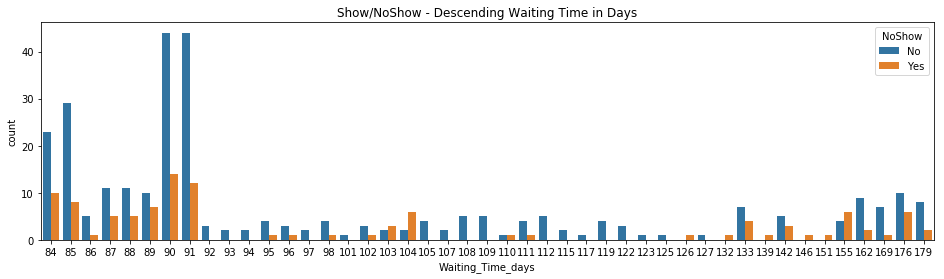

In [85]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df[['Waiting_Time_days']].sort_values('Waiting_Time_days', ascending=False).Waiting_Time_days.iloc[:400], hue=df.NoShow)
ax.set_title("Show/NoShow - Descending Waiting Time in Days")
plt.show()

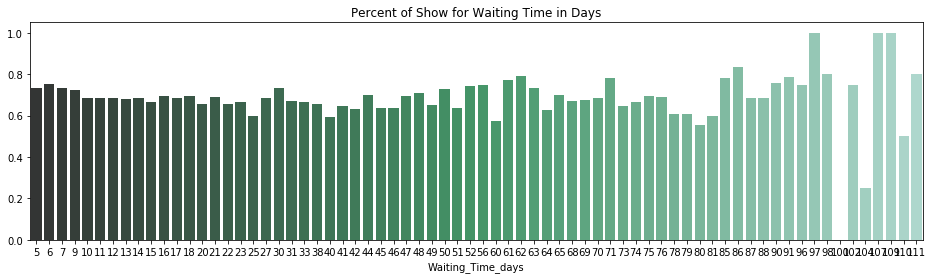

In [86]:
df_w_ratio = df[df.NoShow == 'No'].groupby(['Waiting_Time_days']).size()/df.groupby(['Waiting_Time_days']).size()

plt.figure(figsize=(16,4))
ax = sns.barplot(x=df_w_ratio.index, y=df_w_ratio, order=df.Waiting_Time_days.iloc[:70].index, palette="BuGn_d")
ax.set_title("Percent of Show for Waiting Time in Days")
plt.show()

From the above visualization we can see that around 95% of the patients who have booked their appointments on the same day and visiting the hospital without fail. Also close to 80% of the patients are visiting the hospital if they had booked their appointments just before 4 days.

As we have a clear distinction for the patients Show/NoShow with the Waiting_Time_days feature this indeed should help us with a better prediction.

# Limitations


From the data we can see that the AppointmentDay spans just over a month which means that we were given only a snapshot of complete data. Though there are no null values in the data, making exact predictions and analysis on a snapshot data is difficult and the analysis might not make a representation of the whole data.

Another very important thing that was missing from the data is the Time details in the AppointmentDay which would really help us a lot in predicting NoShow of a patient. As we have the time detail for ScheduledDay, we should have saved the similar thing in AppointmentDay also and not just normalize it.

Also, a reason for the appointment and the consultation doctor specialization would have helped us a lot in making better analysis and predictions for the NoShow of a patient.

# Conclusion


From the above feature importance, we could see that Gender, Age, Neighbourhood, Scholarship and Hypertension are some of the top features that would help us determine if the patient who has taken an appointment will Show/NoShow.